## Observations and Insights 

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from matplotlib.pyplot import figure
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
comb_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
comb_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Checking the number of mice.

# grab the number of unique items in mouse id column
mice_count = int(len(comb_df['Mouse ID'].unique()))
# place into dataframe
tm_df = pd.DataFrame({"Total Mice": mice_count}, index=[0])
# display dataframe and hide index
tm_df.style.hide_index()

Total Mice
249


In [39]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

comb_df[comb_df.duplicated(subset=['Mouse ID','Timepoint'], keep=False) == True]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [40]:
# Optional: Get all the data for the duplicate mouse ID. 

# varaible to hold the duplicate mouse information
dup_mid = comb_df[comb_df.duplicated(['Mouse ID','Timepoint'])]
dup_mid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [41]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# new df without the dup_mid
clean_comb = comb_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first', inplace=False)
clean_comb

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [42]:
# Checking the number of mice in the clean DataFrame.
mice_count = int(len(clean_comb['Mouse ID'].unique()))
tm_df = pd.DataFrame({"Total Mice": mice_count}, index=[0])
tm_df.style.hide_index()

Total Mice
249


## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# group the drug regimens and pull in tumor volume data
regtv = clean_comb.groupby('Drug Regimen')['Tumor Volume (mm3)']
# variables to hold mean, median, variance, standard deviation, and SEM
rtavg = regtv.mean()
rtmed = regtv.median()
rtvar = regtv.var()
rtstd = regtv.std()
rtsem = regtv.sem()
# dataframe to hold all of the stats above
rt_sum = pd.DataFrame({
                    "Mean": rtavg,
                    "Median": rtmed,
                    "Variance": rtvar,
                    "Std. Dev.": rtstd,
                    "SEM": rtsem,
})
rt_sum

,Mean,Median,Variance,Std. Dev.,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
rt_agg = regtv.aggregate(['mean', 'median', 'var', 'std', 'sem'])
rt_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<BarContainer object of 10 artists>

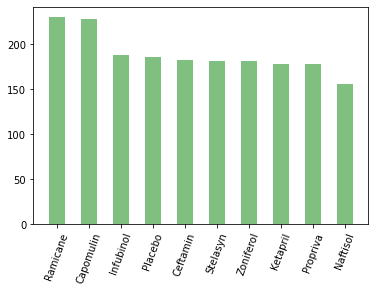

In [45]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
# make list of drug regimens
dr_list = clean_comb['Drug Regimen'].unique()
# place drug regimen list as x axis
x_axis = dr_list
# get the counts of each drug regimen
y_axis = clean_comb['Drug Regimen'].value_counts()
# rotate ticks names on x axis
plt.xticks(rotation = 70)
# matplotlib bar chart
plt.bar(x_axis, y_axis, color='g', width=0.5, alpha=0.5, align="center")

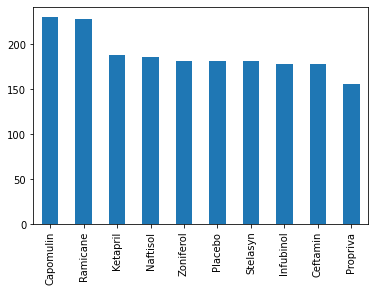

In [46]:
# pandas bar chart
drug_chart = y_axis.plot(kind='bar')
drug_chart

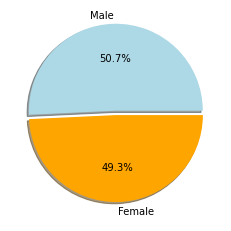

Male      958
Female    930
Name: Sex, dtype: int64

In [47]:
# get the counts of gender in the mice
gender_count = clean_comb['Sex'].value_counts()
# labels for each group
gender = ['Male', 'Female']
# colors for each group
colors = ['lightblue', 'orange']
# spacing between pie pieces
explode = (0.05,0)
# pie chart using matplotlib
plt.pie(gender_count, explode=explode, labels=gender, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=0)
plt.show()
gender_count

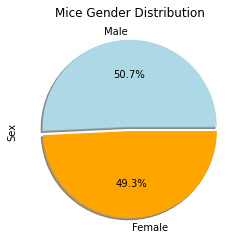

In [48]:
# pie chart using pandas
gender_pie = gender_count.plot(kind="pie", y='gender', title='Mice Gender Distribution', autopct='%1.1f%%', explode=(0.05,0), colors=colors, shadow=True)

## Quartiles, Outliers and Boxplots

In [49]:
# create variable for the four regimens
ftr = clean_comb[(clean_comb['Drug Regimen'] == 'Capomulin') 
                | (clean_comb['Drug Regimen'] == 'Ramicane') 
                | (clean_comb['Drug Regimen'] == 'Infubinol') 
                | (clean_comb['Drug Regimen'] == 'Ceftamin')]
# new dataset dropping the duplicates and keeping their final value
ftv = ftr.drop_duplicates(subset=['Mouse ID', 'Drug Regimen'], keep='last', inplace=False)
# rename the column to Final Tumor Volume
ftv = ftv.rename(columns={'Tumor Volume (mm3)':'Final Tumor Volume'})
ftv


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume,Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [50]:
# get quartiles for final tumor volume for the dataset above
quartiles = ftv['Final Tumor Volume'].quantile([.25,.5,.75])
# set lower quartile
lowerq = quartiles[0.25]
# set upper quartile
upperq = quartiles[0.75]
# calculate interquartile range
iqr = upperq-lowerq
# calculate the lower bound
lower_bound = lowerq - (1.5*iqr)
# calculate the upper bound
upper_bound = upperq + (1.5*iqr)
# print values
print(f"The lower quartile of tumor volume is: {lowerq}")
print(f"The upper quartile of tumor volume is: {upperq}")
print(f"The interquartile range of tumor volume is: {iqr}")
print(f"The the median of tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outliers = ftv[(ftv['Final Tumor Volume'] < lower_bound) | (ftv['Final Tumor Volume'] > upper_bound)]
outliers

The lower quartile of tumor volume is: 37.187743802499995
The upper quartile of tumor volume is: 59.930261755000004
The interquartile range of tumor volume is: 22.74251795250001
The the median of tumor volume is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Final Tumor Volume,Metastatic Sites


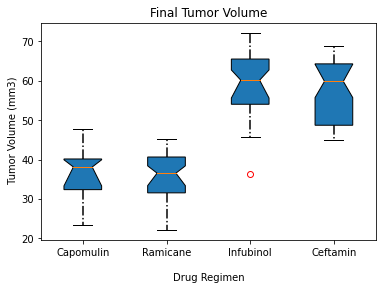

In [51]:
# set dataframes for each drug regimen and get the final tumor volume data
ftvca = ftv[(ftv['Drug Regimen'] == 'Capomulin')]
ftvca = ftvca['Final Tumor Volume']
ftvra = ftv[(ftv['Drug Regimen'] == 'Ramicane')]
ftvra = ftvra['Final Tumor Volume']
ftvinf = ftv[(ftv['Drug Regimen'] == 'Infubinol')]
ftvinf = ftvinf['Final Tumor Volume']
ftvce = ftv[(ftv['Drug Regimen'] == 'Ceftamin')]
ftvce = ftvce['Final Tumor Volume']

# set dictionary to hold all four dataframes
drug_dict = {'Capomulin':ftvca, 'Ramicane':ftvra, 'Infubinol':ftvinf, 'Ceftamin':ftvce}

# set the variable for the plot
fig1, ax1 = plt.subplots()
# color for outliers
r = 'red'
# set titles
ax1.set_title('Final Tumor Volume')
ax1.set_xlabel('\nDrug Regimen')
ax1.set_ylabel(' Tumor Volume (mm3)')
# plot the box and whisker plot and set properties
ax1.boxplot(drug_dict.values(), notch=True, bootstrap=1000, patch_artist=True, 
                                whiskerprops=dict(linestyle='-.',linewidth=1.5, color='black'),
                                flierprops=dict(color=r, markeredgecolor=r))
# grab the labels of the drug regimens for the x axis
ax1.set_xticklabels(drug_dict.keys())
plt.show()


## Line and Scatter Plots

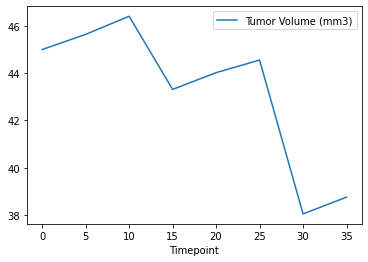

In [52]:
# variable for Capomulin
cp_df = clean_comb[clean_comb['Drug Regimen'] == 'Capomulin']
# variable for a specific mouse
cp_id = cp_df[cp_df['Mouse ID'] == 'j246']
# set the index as the timepoints for the x axis
cp_id = cp_id.set_index('Timepoint')
# variable to grab the tumor volume data
cid_df = cp_id[['Tumor Volume (mm3)']]
cid_df.plot()

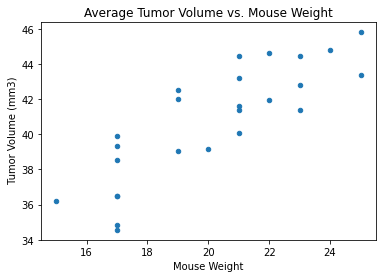

In [53]:
# variable to hold mouse id, weight, and tumor volume from the prevous dataset
atv = cp_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
# set new data frame to group the mice together and get their average tumor volume
avgw = pd.DataFrame(atv.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
# rename the tumor volume column
avgw = avgw.rename(columns={'Tumor Volume (mm3)':'Average Tumor Volume'})
# plot the scatter plot using the weight vs avg tumor volume
avgw.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume", title="Weight vs. Average Tumor Volume")
# set titles and labels
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel(' Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

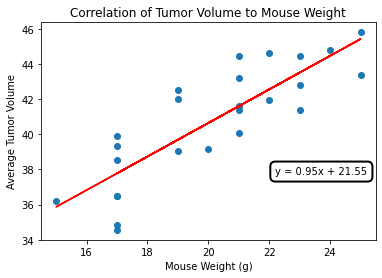

The linear regression equation is: y = 0.95x + 21.55
The r-squared is: 0.7088568047708717

The correlation coefficient between mouse weight and average tumor volume is: 0.84

Weight (g)            Average Tumor Volume    0.841936
Average Tumor Volume  Weight (g)              0.841936
Weight (g)            Weight (g)              1.000000
Average Tumor Volume  Average Tumor Volume    1.000000
dtype: float64


In [54]:
# correlation for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avgw['Weight (g)'],avgw['Average Tumor Volume'])
# variable for all correlation stats
cp_corr = avgw.corr()
# set x and y values
x_values = avgw['Weight (g)']
y_values = avgw['Average Tumor Volume']
# linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# variable for calculation of regression line
regress_values = x_values * slope + intercept
# variable for equation of slope intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# scatter plot of weight and average tumor volume
plt.scatter(x_values,y_values)
# plot the line of the slope intercept equation
plt.plot(x_values,regress_values,"red")
# style the box for the equation
le_bbox = dict(boxstyle="round,pad=0.5", fc="w", ec="k", lw=2)
# add the equation to the plot
plt.annotate(line_eq,
            xy=(0, 1.5),
            xycoords='axes fraction',
            xytext=(0.7, .3),
            bbox=le_bbox)# set the title and axis labels
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume')
plt.title('Correlation of Tumor Volume to Mouse Weight')
plt.show()
# print the stats we calculated
print(f"The linear regression equation is: {line_eq}")
print(f"The r-squared is: {rvalue**2}")
print(f'\nThe correlation coefficient between mouse weight and average tumor volume is: {round(correlation[0],2)}\n')
print(f'{cp_corr.unstack().sort_values()}')
